#  <span style="color: #2A8E3C;"> **Lift & Lead - Análisis de Mercado** </span>

## <span style="color: #2A8E3C;"> **Análisis de mercado para la apertura de centros especializados de Halterofilia** </span>

<span style="color: #E3B800;"> ***Lift & Lead***, </span> es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de <span style="color: #E3B800;"> ***Lift & Lead***, </span>  busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. <span style="color: #E3B800;"> **Fase 1**, </span> : Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. <span style="color: #E3B800;"> **Fase 2**, </span> Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024

![Halterofilia](images/allfreeweight.png)

# <span style="color: #2A8E3C;">  **Parte 1.** Disponemos de la información </span> 

## <span style="color: #2A8E3C;">  Paso 1. Importar librerías </span> 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

import os

c:\Users\Usuario\anaconda3\envs\KERNEL_CON_PANDAS\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## <span style="color: #2A8E3C;">  Paso 2. Cargar datos </span>

In [2]:
path = 'data/' 

ficheros = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]

dict_datos = {}
for file in ficheros:
    if file.endswith(('.csv', '.xlsx')):
        print(file)
        if file.endswith('.csv'):
            df = pd.read_csv(path + file)
        else:
            df = pd.read_excel(path + file)
        dict_datos[file] = df

Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv
Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv


## <span style="color: #2A8E3C;">  Paso 3. Exploración inicial </span> 

Creamos una función que nos permitirá hacer una exploración inicial de los datos, para ver si hay que hacer algún tratamiento previo a la limpieza de los datos y la aplicamos directamente al dictado dataframes.

In [3]:

def exploracion_inicial(df, tipo = None):
    if tipo == 'lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n########################################################################################')
       
        print("¿Hay filas duplicadas en el conjunto de datos?")
        dup_count = df.duplicated().sum()
        has_duplicates = dup_count > 0
        print(f"\tExisten duplicados: {has_duplicates}")
        print(f"\tNúmero total de filas duplicadas: {dup_count}")
        
        if has_duplicates and dup_count <= 5:
            print("\tFilas duplicadas (mostrando hasta 5):")
            display(df[df.duplicated(keep=False)].head())
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n########################################################################################')
       
        print("¿Hay filas duplicadas en el conjunto de datos?")
        dup_count = df.duplicated().sum()
        has_duplicates = dup_count > 0
        print(f"\tExisten duplicados: {has_duplicates}")
        print(f"\tNúmero total de filas duplicadas: {dup_count}")
        
        if has_duplicates and dup_count <= 5:
            print("\tFilas duplicadas (mostrando hasta 5):")
            display(df[df.duplicated(keep=False)].head())
        print('\n########################################################################################')

In [4]:
for k, v in dict_datos.items():
    print("_"*len(k))
    print(k)
    print("_"*len(k))
    exploracion_inicial(df= v)

_____________________________________________________________
Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv
_____________________________________________________________
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 20 filas y 6 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (10.04),Anastasiya Romanova Rusia 112 + 128 = 240,Emily Godley Reino Unido 93 + 123 = 216,Mădălina Molie Rumania 101 + 114 = 215,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
17,81 kg[n 2]​ (12.04),Nina Schroth Alemania 102 + 120 = 222,Anna Van Bellinghen Bélgica 103 + 118 = 221,Liana Guiurdzhian Armenia 97 + 120 = 217,2019,Femenino
18,87 kg (12.04),Xeniya Pasjina Rusia 110 + 132 = 242,Diana Mstiyeva Rusia 110 + 130 = 240,Sarah Fischer Austria 102 + 129 = 231,2019,Femenino
19,+87 kg (13.04),Tatiana Kashirina Rusia 146 + 185 = 331,Anastasiya Lysenko Ucrania 120 + 148 = 268,Emily Campbell Reino Unido 115 + 145 = 260,2019,Femenino



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
13,59 kg (08.04),Rebeka Koha Letonia 101 + 120 = 221,Tatiana Aleyeva Rusia 94 + 120 = 214,Alexandra Kozlova Rusia 96 + 117 = 213,2019,Femenino
12,55 kg (07.04),Joanna Łochowska Polonia 87 + 112 = 199,Svetlana Yershova Rusia 90 + 108 = 198,Kristina Novitskaya Rusia 85 + 105 = 190,2019,Femenino
10,45 kg (06.04),Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​,Ivana Petrova Bulgaria 69 + 89 = 158[n 1]​,Yuliya Asayonak Bielorrusia 69 + 81 = 150[n 1]​,2019,Femenino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Año
	 - Genero

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    5
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----

,Eventos,Oro,Plata,Bronce,Año,Genero
count,20,20,20,20,20.0,20
unique,20,20,20,20,,2
top,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,,Masculino
freq,1,1,1,1,,10
mean,,,,,2019.0,
std,,,,,0.0,
min,,,,,2019.0,
25%,,,,,2019.0,
50%,,,,,2019.0,
75%,,,,,2019.0,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################
_____________________________________________________________
Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv
_____________________________________________________________
¿Cuántas filas y columnas hay en el conjunto d

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2020,Femenino
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2020,Femenino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
12,55 kg (04.04),Kamila Konotop Ucrania 95 + 113 = 208,Svetlana Yershova Rusia 88 + 112 = 200,Nina Sterckx Bélgica 88 + 109 = 197,2020,Femenino
11,49 kg (03.04),Monica Csengeri Rumania 86 + 103 = 189,Kristina Sobol Rusia 85 + 96 = 181,Mihaela Cambei Rumania 80 + 100 = 180,2020,Femenino



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Año
	 - Genero

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    5
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----

,Eventos,Oro,Plata,Bronce,Año,Genero
count,20,20,20,20,20.0,20
unique,19,20,20,20,,2
top,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,,Masculino
freq,2,1,1,1,,10
mean,,,,,2020.0,
std,,,,,0.0,
min,,,,,2020.0,
25%,,,,,2020.0,
50%,,,,,2020.0,
75%,,,,,2020.0,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


No hay nulos ni duplicados.

Hay caracteres extraños que debemos limpiar.

Hay columnas con muchos datos que deberíamos separar en distintas columnas para analizarlos de manera correcta.

Por ejemplo, columna `Oro`:

`Mirco Scarantino Italia 116 + 145 = 261[n 1]​`


## <span style="color: #2A8E3C;"> Paso 4. Crear un único dataframe con los datos de 2019 y 2020 </span> 

Como tienen la misma estructura, los concatenaremos en un mismo dataframe para proceder a la limpieza de los datos.

In [5]:
df = pd.concat(dict_datos.values(), ignore_index=True)
df.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


## <span style="color: #2A8E3C;"> Paso 5. Transformar los datos </span> 

Para empezar a ordenar las columnas crearemos nuevas columnas:
- `Medalla` donde indicaremos si es Oro, Plata o Bronce.
- `Atleta`donde indicaremos los datos que actualmente se encuentran en las columnas `Oro`, `Plata` y `Bronce`.

In [6]:
def transformar_datos(df):
   
    # Transformar el DataFrame de formato ancho a formato largo usando pd.melt
    
    df_melted = pd.melt(
        df,
        # Las columnas id_vars se conservan en cada fila
        id_vars=['Eventos', 'Año', 'Genero'],   # Columnas que mantienen su estructura original
        # Las columnas value_vars se convierten en valores de la nueva columna 'Medalla'
        value_vars=['Oro', 'Plata', 'Bronce'],  # Columnas que se convertirán en valores
        var_name='Medalla',                     # Nombre de la columna para los tipos de medalla
        # Los valores originales de estas columnas se almacenan en la nueva columna 'Atleta'
        value_name='Atleta'                     # Nombre de la columna para los nombres de atletas
    )

    return df_melted

Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [7]:
df_medallas = transformar_datos (df)
exploracion_inicial(df= df_medallas, tipo = 'lite')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 5 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Año        0
Genero     0
Medalla    0
Atleta     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Año        0.0
Genero     0.0
Medalla    0.0
Atleta     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


## <span style="color: #2A8E3C;"> Paso 6. Creación de columnas </span> 

Vamos a crear las siguientes columnas:
- `Fecha` : Juntando los datos de día y mes de la columna `Evento`y el `Año`
- `Nombre`: Extrayendo los datos de la columna `Atleta`
- `Apellido`: Extrayendo los datos de la columna `Atleta`
- `País`: Extrayendo los datos de la columna `Atleta`
- `Resultados`: Extrayendo los datos de la columna `Atleta`
- `Arrancada` : Extrayendo los datos de la columna `Atleta`
- `Dos tiempos`: Extrayendo los datos de la columna `Atleta`
- `Total`: Extrayendo los datos de la columna `Atleta`

Empiezo buscando caracteres extraños en las columnas que voy a tratar para que las funciones se apliquen correctamente.

Para ello anoto los caracteres extraños encontrados.

In [8]:
df_medallas['Eventos'].unique() #\xa0 #[n 2]\u200b 

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)',
       '81\xa0kg[n 2]\u200b (12.04)', '87\xa0kg (12.04)',
       '+87\xa0kg (13.04)', '55\xa0kg (04.04)', '61\xa0kg (04.04)',
       '67\xa0kg (05.04)', '73\xa0kg (06.04)', '81\xa0kg (07.04)',
       '89\xa0kg (08.04)', '96\xa0kg (09.04)', '102\xa0kg (10.04)',
       '109\xa0kg (10.04)', '+109\xa0kg (11.04)', '45\xa0kg (03.04)',
       '49\xa0kg (03.04)', '59\xa0kg (05.04)', '64\xa0kg (06.04)',
       '71\xa0kg (07.04)', '76\xa0kg (08.04)', '81\xa0kg (09.04)',
       '87\xa0kg (10.04)', '+87\xa0kg (11.04)'], dtype=object)

In [9]:
df_medallas['Atleta'].unique() #[n 1]\u200b' #[2]​

array(['Mirco Scarantino Italia  116 + 145 = 261[n 1]\u200b',
       'Henadz Laptseu Bielorrusia  133 + 153 = 286',
       'Bernardin Matam Francia  137 + 175 = 312',
       'Bozhidar Andreev Bulgaria  153 + 192 = 345',
       'Antonino Pizzolato Italia  155 + 201 = 356',
       'Hakob Mkrtchian Armenia  164 + 207 = 371',
       'Yauheni Tsijantsou Bielorrusia  178 + 222 = 400',
       'Dmytro Chumak Ucrania  175 + 216 = 391',
       'Simon Martirosian Armenia  192 + 235 = 427',
       'Lasha Talajadze Georgia  218 + 260 = 478',
       'Şaziye Erdoğan Turquía  75 + 88 = 163[n 1]\u200b',
       'Elena Andrieș Rumania  87 + 103 = 190',
       'Joanna Łochowska Polonia  87 + 112 = 199',
       'Rebeka Koha Letonia  101 + 120 = 221',
       'Loredana Toma Rumania  111 + 128 = 239',
       'Anastasiya Romanova Rusia  112 + 128 = 240',
       'Daria Naumava Bielorrusia  106 + 136 = 242',
       'Nina Schroth Alemania  102 + 120 = 222',
       'Xeniya Pasjina Rusia  110 + 132 = 242',
       '

Los caracteres que hemos identificados son:

- `\u200b `- Espacio de ancho cero (Zero Width Space): Un carácter invisible utilizado en tipografía web para indicar posibles puntos de ruptura de línea sin mostrar espacios.
- `\xa0` - Espacio duro o no rompible (Non-Breaking Space): Representado como &nbsp; en HTML, impide que se produzcan saltos de línea en ciertos puntos del texto.
- `[2]`, `[n 1] `- Marcadores de referencias o notas al pie: Típicamente utilizados en Wikipedia y otras fuentes académicas para señalar referencias.

Por ahora vamos a eliminar `[n 1]\u200b`, `[2]`,​ `[n 2]\u200b `

In [10]:
columnas_resultado = ['Eventos', 'Año', 'Atleta']

df_medallas[columnas_resultado] = df_medallas[columnas_resultado].replace(r'\[\s*(n\s*)?[12]\]\s*[\u200B]*', '', regex=True)

In [11]:
#Comprobamos que se ha elimando correctamente [n 2]\u200b y que solo queda \xa0
df_medallas['Eventos'].unique() #\xa0 

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)', '81\xa0kg (12.04)',
       '87\xa0kg (12.04)', '+87\xa0kg (13.04)', '55\xa0kg (04.04)',
       '61\xa0kg (04.04)', '67\xa0kg (05.04)', '73\xa0kg (06.04)',
       '81\xa0kg (07.04)', '89\xa0kg (08.04)', '96\xa0kg (09.04)',
       '102\xa0kg (10.04)', '109\xa0kg (10.04)', '+109\xa0kg (11.04)',
       '45\xa0kg (03.04)', '49\xa0kg (03.04)', '59\xa0kg (05.04)',
       '64\xa0kg (06.04)', '71\xa0kg (07.04)', '76\xa0kg (08.04)',
       '81\xa0kg (09.04)', '87\xa0kg (10.04)', '+87\xa0kg (11.04)'],
      dtype=object)

In [12]:
#Comprobamos que se han elimando correctamente los caracteres extraños.
df_medallas['Atleta'].unique()

array(['Mirco Scarantino Italia  116 + 145 = 261',
       'Henadz Laptseu Bielorrusia  133 + 153 = 286',
       'Bernardin Matam Francia  137 + 175 = 312',
       'Bozhidar Andreev Bulgaria  153 + 192 = 345',
       'Antonino Pizzolato Italia  155 + 201 = 356',
       'Hakob Mkrtchian Armenia  164 + 207 = 371',
       'Yauheni Tsijantsou Bielorrusia  178 + 222 = 400',
       'Dmytro Chumak Ucrania  175 + 216 = 391',
       'Simon Martirosian Armenia  192 + 235 = 427',
       'Lasha Talajadze Georgia  218 + 260 = 478',
       'Şaziye Erdoğan Turquía  75 + 88 = 163',
       'Elena Andrieș Rumania  87 + 103 = 190',
       'Joanna Łochowska Polonia  87 + 112 = 199',
       'Rebeka Koha Letonia  101 + 120 = 221',
       'Loredana Toma Rumania  111 + 128 = 239',
       'Anastasiya Romanova Rusia  112 + 128 = 240',
       'Daria Naumava Bielorrusia  106 + 136 = 242',
       'Nina Schroth Alemania  102 + 120 = 222',
       'Xeniya Pasjina Rusia  110 + 132 = 242',
       'Tatiana Kashirina Rusi

In [13]:
def crear_columnas_desde_Atleta(df):
    # Inicialización de listas para almacenar los valores extraídos
    columna_Atleta = list()
    columna_Nombre = list()
    columna_Apellido = list()
    columna_País = list()
    columna_errores = list()  # Para registrar casos que no se ajusten al formato esperado
    
    for atleta in df.Atleta.to_list():
        # Ejemplo de entrada: 'Mirco Scarantino Italia 116 + 145 = 261'
        
        # Separa por el primer "+" y toma la parte inicial: 'Mirco Scarantino Italia 116'
        atletas = (list(atleta.split("+"))[0])[:-4]  # Elimina los últimos 4 caracteres (el número antes del +)
                                                     # Quedando: 'Mirco Scarantino Italia  '
        
        # Extrae la primera palabra como el nombre
        Palabra_1 = " ".join(list(atletas.split(" "))[:1])  # Obtiene 'Mirco'
        
        # El resto de palabras contienen apellido y país
        Palabra_3 = " ".join(list(atletas.split(" "))[1:]).strip().split(" ")  # Contiene apellido y país: ['Scarantino', 'Italia']
        
        #Compruebo cuál es el máximo de palabras en Palabra_3
        # if len(Palabra_3) >2:
        #     print(Palabra_3, len(Palabra_3))
        # ['Godley', 'Reino', 'Unido'] 3
        # ['Campbell', 'Reino', 'Unido'] 3
        # ['Godley', 'Reino', 'Unido'] 3
        # ['Van', 'Bellinghen', 'Bélgica'] 3
        # ['Davies', 'Reino', 'Unido'] 3
        # ['Smith', 'Reino', 'Unido'] 3
        # ['Campbell', 'Reino', 'Unido'] 3
        
        # Gestión de casos según el número de palabras en Palabra_3
        if len(Palabra_3) == 2:
            # Caso simple: [Apellido, País]
            Apellido = (Palabra_3[0]).split("[")[0]  # Elimina posibles marcadores como [1] en apellidos
            columna_Apellido.append(Apellido)
            columna_País.append(str(Palabra_3[1]))
            
        elif len(Palabra_3) == 3:
            # Casos con 3 palabras, que pueden ser:
            # ['Godley', Reino, Unido] :  Apellido + País compuesto
            # [Van, Bellinghen, Bélgica] : Apellido compuesto + País:
            
            if Palabra_3[-1] == "Unido":  #El único país que he encontrado con dos palabras es Reino Unido. Si en nuevas tablas aparecen otros países hay que añadirlo aquí.
                columna_Apellido.append(str(Palabra_3[0]))
                columna_País.append((str(Palabra_3[1])) + " " + (str(Palabra_3[2])))  # "Reino Unido"
            else:
                # Si el país no es "Reino Unido" asume que es un apellido compuesto
                columna_Apellido.append((str(Palabra_3[0])) + " " + (str(Palabra_3[1])))
                columna_País.append(str(Palabra_3[-1]))
                
                
        else:
            # Registra casos que no se ajusten a los patrones anteriores
            columna_errores.append(str(Palabra_3))
            
        # Guarda el nombre extraído
        columna_Nombre.append(Palabra_1)
    
    # Asigna las listas resultantes como nuevas columnas en el DataFrame
    df["Nombre"] = pd.Series(columna_Nombre).reset_index(drop=True)
    df["Apellido"] = pd.Series(columna_Apellido).reset_index(drop=True)
    df["País"] = pd.Series(columna_País).reset_index(drop=True)
    
    # Extrae los resultados numéricos con una expresión regular
    # Ejemplo: De 'Mirco Scarantino Italia 116 + 145 = 261' extrae '116 + 145 = 261'
    df['Resultados'] = df['Atleta'].str.replace(
        r'^[^\d]+(\d+\s*\+\s*\d+\s*=\s*\d+)', 
        r'\1', 
        regex=True
    )
    
    # Informa sobre el número de registros con formato inesperado
    print('Errores =', len(columna_errores))

Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [14]:
crear_columnas_desde_Atleta (df = df_medallas)
exploracion_inicial(df = df_medallas, tipo='lite')

Errores = 0
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 9 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Mirco,Scarantino,Italia,116 + 145 = 261
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,Henadz,Laptseu,Bielorrusia,133 + 153 = 286



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos       0
Año           0
Genero        0
Medalla       0
Atleta        0
Nombre        0
Apellido      0
País          0
Resultados    0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos       0.0
Año           0.0
Genero        0.0
Medalla       0.0
Atleta        0.0
Nombre        0.0
Apellido      0.0
País          0.0
Resultados    0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


In [15]:
def crear_columnas_desde_Resultados(df):
    # Inicialización de listas para almacenar los valores extraídos
    columna_Resultados = list()  
    columna_Arrancada = list()
    columna_Dos_tiempos = list()
    columna_Total = list()
    
    for resultado in df.Resultados.to_list():
        # Ejemplo de entrada: '116 + 145 = 261'
        
        resultado = resultado.strip()  # Elimina espacios en blanco al inicio y final
        
        # Extrae el primer número (Arrancada)
        # De '116 + 145 = 261' obtiene '116'
        Puntuacion_Arrancada = "".join(list(resultado.split("+"))[:1])  # Obtiene '116'
        
        # Obtiene la parte después del "+"
        # De '116 + 145 = 261' obtiene ' 145 = 261'
        Puntuacion = " ".join(list(resultado.split("+"))[1:2])  # Obtiene ' 145 = 261'
        
        # De ' 145 = 261' obtiene ' 145 '
        Puntuacion_Dos_tiempos = "".join(list(Puntuacion.split("="))[:1])  # Obtiene ' 145 '
        
        # De ' 145 = 261' obtiene ' 261'
        Puntuacion_total = "".join(list(Puntuacion.split("="))[1:])  # Obtiene ' 261'
        
        # Limpia Puntuacion_total para conservar solo dígitos, signos + y -
        # De ' 261' obtiene '261'
        Puntuacion_total_ = re.sub(r'[^\d+-]', '', Puntuacion_total)  # Obtiene '261'
        
        # Agrega los valores extraídos a las listas correspondientes
        columna_Arrancada.append(Puntuacion_Arrancada)
        columna_Dos_tiempos.append(Puntuacion_Dos_tiempos)
        columna_Total.append(Puntuacion_total_)
    
    # Asigna las listas resultantes como nuevas columnas en el DataFrame
    df["Arrancada"] = pd.Series(columna_Arrancada).reset_index(drop=True)
    df["Dos Tiempos"] = pd.Series(columna_Dos_tiempos).reset_index(drop=True)
    df["Total"] = pd.Series(columna_Total).reset_index(drop=True)

Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [16]:
crear_columnas_desde_Resultados(df = df_medallas)
exploracion_inicial(df = df_medallas, tipo='lite')


¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 12 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Mirco,Scarantino,Italia,116 + 145 = 261,116,145,261
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,Henadz,Laptseu,Bielorrusia,133 + 153 = 286,133,153,286



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos        0
Año            0
Genero         0
Medalla        0
Atleta         0
Nombre         0
Apellido       0
País           0
Resultados     0
Arrancada      0
Dos Tiempos    0
Total          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos        0.0
Año            0.0
Genero         0.0
Medalla        0.0
Atleta         0.0
Nombre         0.0
Apellido       0.0
País           0.0
Resultados     0.0
Arrancada      0.0
Dos Tiempos    0.0
Total          0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

#########################################################

Vamos a eliminar `\xa0kg`

In [17]:
df_medallas['Eventos'].unique() #\xa0kg

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)', '81\xa0kg (12.04)',
       '87\xa0kg (12.04)', '+87\xa0kg (13.04)', '55\xa0kg (04.04)',
       '61\xa0kg (04.04)', '67\xa0kg (05.04)', '73\xa0kg (06.04)',
       '81\xa0kg (07.04)', '89\xa0kg (08.04)', '96\xa0kg (09.04)',
       '102\xa0kg (10.04)', '109\xa0kg (10.04)', '+109\xa0kg (11.04)',
       '45\xa0kg (03.04)', '49\xa0kg (03.04)', '59\xa0kg (05.04)',
       '64\xa0kg (06.04)', '71\xa0kg (07.04)', '76\xa0kg (08.04)',
       '81\xa0kg (09.04)', '87\xa0kg (10.04)', '+87\xa0kg (11.04)'],
      dtype=object)

In [18]:
def crear_columnas_desde_Eventos(df): 
    # Lista para almacenar las fechas extraídas de la columna 'Eventos'
    lista_fechas = list()

    # Iterar sobre cada evento en la columna 'Eventos'
    for evento in df.Eventos.to_list():
        # Ejemplo de evento: "55\xa0kg (06.04)"
        
        # Dividir el string por el paréntesis de apertura y tomar la segunda parte
        fechas = " ".join(evento.split("(")[1:])  # Obtiene "06.04)"
        
        # Eliminar el paréntesis de cierre y reemplazar puntos por guione
        fechas = fechas[:-1].replace(".", "-")  #Obtiene "06-04"
        
        # Agregar la fecha procesada a la lista
        lista_fechas.append(fechas)

    # Crear una nueva columna 'Fecha' en el DataFrame con las fechas extraídas
    df["Fecha"] = pd.Series(lista_fechas).reset_index(drop=True)

    # Concatenar el año correspondiente para formar una fecha completa: "MM-DD-YYYY"
    df["Fecha"] = df["Fecha"] + "-" + df["Año"].astype(str)


Realizamos la transformación y comprobamos que el dataframe resultante no tenga nulos ni duplicados y los datos sigan siendo consistentes.

In [19]:
crear_columnas_desde_Eventos(df = df_medallas)
exploracion_inicial(df = df_medallas, tipo='lite')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 13 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Mirco,Scarantino,Italia,116 + 145 = 261,116,145,261,06-04-2019
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,Henadz,Laptseu,Bielorrusia,133 + 153 = 286,133,153,286,07-04-2019



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos        0
Año            0
Genero         0
Medalla        0
Atleta         0
Nombre         0
Apellido       0
País           0
Resultados     0
Arrancada      0
Dos Tiempos    0
Total          0
Fecha          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos        0.0
Año            0.0
Genero         0.0
Medalla        0.0
Atleta         0.0
Nombre         0.0
Apellido       0.0
País           0.0
Resultados     0.0
Arrancada      0.0
Dos Tiempos    0.0
Total          0.0
Fecha          0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

#####################

Comprobamos cómo quedan las nuevas columnas

In [20]:
df_medallas[['Fecha', 'Nombre', 'Apellido', 'País', 'Resultados', 'Arrancada', 'Dos Tiempos', 'Total']].head()

,Fecha,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total
0,06-04-2019,Mirco,Scarantino,Italia,116 + 145 = 261,116,145,261
1,07-04-2019,Henadz,Laptseu,Bielorrusia,133 + 153 = 286,133,153,286
2,08-04-2019,Bernardin,Matam,Francia,137 + 175 = 312,137,175,312
3,09-04-2019,Bozhidar,Andreev,Bulgaria,153 + 192 = 345,153,192,345
4,10-04-2019,Antonino,Pizzolato,Italia,155 + 201 = 356,155,201,356


## <span style="color: #2A8E3C;"> Paso 7. Filtrado de columnas y ordenación </span> 

Creamos la columnas:

- `Categoría`: Debemos limpiar los caracteres extraños.

Y creamos el nuevo DataFrame solo con las columnas que nos solicitan:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

Selecciono solo las columnas que voy a utilizar:

In [21]:
df_columnas = df_medallas.loc[:,['Genero','Eventos', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']]
df_columnas.head()

,Genero,Eventos,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,Masculino,55 kg (06.04),06-04-2019,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg (07.04),07-04-2019,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg (08.04),08-04-2019,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg (09.04),09-04-2019,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg (10.04),10-04-2019,Oro,Antonino,Pizzolato,Italia,155,201,356


In [22]:
df_columnas['Eventos'].unique() #\xa0

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)', '81\xa0kg (12.04)',
       '87\xa0kg (12.04)', '+87\xa0kg (13.04)', '55\xa0kg (04.04)',
       '61\xa0kg (04.04)', '67\xa0kg (05.04)', '73\xa0kg (06.04)',
       '81\xa0kg (07.04)', '89\xa0kg (08.04)', '96\xa0kg (09.04)',
       '102\xa0kg (10.04)', '109\xa0kg (10.04)', '+109\xa0kg (11.04)',
       '45\xa0kg (03.04)', '49\xa0kg (03.04)', '59\xa0kg (05.04)',
       '64\xa0kg (06.04)', '71\xa0kg (07.04)', '76\xa0kg (08.04)',
       '81\xa0kg (09.04)', '87\xa0kg (10.04)', '+87\xa0kg (11.04)'],
      dtype=object)

In [23]:
#Extraer solo los números y añadir espacio y kg
df_columnas["Categoría"] = df_columnas.Eventos.str.extract(r'(\+?\d{1,3})')[0] + " kg" 

#Compruebar si se ha eliminado correctamente el \xa0 y añadido kg
df_columnas['Categoría'].unique() 

array(['55 kg', '61 kg', '67 kg', '73 kg', '81 kg', '89 kg', '96 kg',
       '102 kg', '109 kg', '+109 kg', '45 kg', '49 kg', '59 kg', '64 kg',
       '71 kg', '76 kg', '87 kg', '+87 kg'], dtype=object)

Ordeno las columnas para que queden en el orden solicitado:

In [24]:
df_columnas= df_columnas[['Genero', 'Categoría', 'Fecha', 'Medalla','Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']].copy()
df_columnas.head()

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,Masculino,55 kg,06-04-2019,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,07-04-2019,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,08-04-2019,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,09-04-2019,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,10-04-2019,Oro,Antonino,Pizzolato,Italia,155,201,356


##  <span style="color: #2A8E3C;"> Paso 8. Tipo de datos  </span>

Debemos modificar los tipos de las distintas columnas para poder analizarlos correctamente:

- **Género**: `object`
- **Categoría**: `object`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

### Datetime

In [25]:
def fecha_procesada(df, variable_analisis): 
    # Convertir la columna 'Fecha' a datetime
    # Valor de entrada: '06-04-2019'
    # El formato "%d-%m-%Y" coincide con "06-04-2019" (donde 06 es el día, 04 es el mes, y 2019 es el año)
    # Si alguna fecha no se ajusta a este formato, 'errors="coerce"' convertirá esos valores en 'NaT' (Not a Time)
    df[variable_analisis + '_procesada'] = pd.to_datetime(df[variable_analisis], format='%d-%m-%Y', errors='coerce')

    # Mostrar las primeras filas de la columna original y la nueva columna 'variable_analisis_procesada'
    df[[variable_analisis, variable_analisis + '_procesada']].head()

    # Calcular cuántos valores nulos (NaT) hay en la columna 'Fecha_procesada'
    nulos = df[variable_analisis + '_procesada'].isnull().sum()
    
    # Mostrar los valores nulos.
    print(f"Número de valores nulos en '{variable_analisis}_procesada': {nulos}") #0 si todo es correcto

    # Asignar los valores procesados a la columna 'Fecha' (renombrar la columna)
    df['Fecha'] = df[variable_analisis + '_procesada']

    # Eliminar la columna temporal 'Fecha_procesada' tras comprobar que no tiene valores nulos
    df.drop(columns=[variable_analisis + '_procesada'], inplace=True)


In [26]:
fecha_procesada(df_columnas, variable_analisis = 'Fecha')

Número de valores nulos en 'Fecha_procesada': 0


### Integer

In [27]:
def tipo_de_dato_integer(df, variable_a_transformar):
    try:
        # Convertir la columna a numérico, los no numéricos se convierten a NaN
        df[variable_a_transformar] = pd.to_numeric(df[variable_a_transformar], errors='coerce')
        
        # Contar los valores nulos (NaN) después de la conversión
        nulos = df[variable_a_transformar].isnull().sum()
        
        # Mostrar el número de valores nulos
        print(f"Número de valores nulos en {variable_a_transformar}: {nulos}")
        
        # Reemplazar NaN por 0 y convertir a entero (int64)
        df[variable_a_transformar] = df[variable_a_transformar].fillna(0).astype('int64')
    
    except Exception as e:
        # Si ocurre un error, mostrar el mensaje
        print(f"No es posible transformar a integer: {e}")


In [28]:
columnas_a_integer = ['Arrancada', 'Dos Tiempos', 'Total']
for columnas in columnas_a_integer:
    tipo_de_dato_integer(df = df_columnas , variable_a_transformar = columnas)
df_columnas.head(1)


Número de valores nulos en Arrancada: 0
Número de valores nulos en Dos Tiempos: 0
Número de valores nulos en Total: 0


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,Masculino,55 kg,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261


### Category

In [86]:
# Crear una lista con las categorías de medallas en el orden deseado
orden_medallas= ['Oro', 'Plata', 'Bronce']
# Convertir la columna 'Medalla' a tipo categórico y especificar el orden
df_columnas.Medalla = pd.Categorical(df_columnas.Medalla, categories=orden_medallas)

In [30]:
# Comprobar el tipo de datos de cada columna
df_columnas.dtypes

Genero                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos Tiempos             int64
Total                   int64
dtype: object

## <span style="color: #2A8E3C;"> Paso 9. Ordendar </span> 

Nos solicitan ordenar la tabla por Categoría, Género y Medalla

In [31]:
# Crear una lista con las categorías de Género en el orden deseado
orden_genero = ['Femenino', 'Masculino']
# Convertir la columna 'Genero' a tipo categórico y especificar el orden
df_columnas.Genero = pd.Categorical(df_columnas.Genero, categories=orden_genero)

In [32]:
# Extraer las categorías únicas de la columna 'Categoría' y convertir a lista
categorias = list(df_columnas.Categoría.unique()).copy()

# Extraer los números de las categorías y ordenar de menor a mayor
orden_num_categoria = sorted(list(map(lambda x: int(re.findall(r'\d+', x)[0]), categorias)))

# Inicializar un diccionario para contar repeticiones y una lista para el resultado final
repeticiones = {}
orden_categoria = []

# Iterar sobre la lista ordenada
for x in orden_num_categoria:
    # Contamr cuántas veces aparece cada número
    repeticiones[x] = repeticiones.get(x, 0) + 1
    
    # Si el número aparece dos veces, añadir '+' antes de 'kg'
    if repeticiones[x] == 2:
        orden_categoria.append(f'+{x} kg')
    else:
        # Si aparece una sola vez, simplemente añadimos 'kg'
        orden_categoria.append(f'{x} kg')

# Imprimir el resultado final
print(orden_categoria)

['45 kg', '49 kg', '55 kg', '59 kg', '61 kg', '64 kg', '67 kg', '71 kg', '73 kg', '76 kg', '81 kg', '87 kg', '+87 kg', '89 kg', '96 kg', '102 kg', '109 kg', '+109 kg']


In [33]:
# Convertir la columna 'Categoría' a tipo categórico y especificar el orden
df_columnas.Categoría = pd.Categorical(df_columnas.Categoría, categories=orden_categoria)

In [34]:
# Crear DataFrame ordenado por las columnas 'Genero', 'Categoría' y 'Medalla' conforme a solicitud
df_columnas_orden = df_columnas.sort_values(by=['Genero', 'Categoría', 'Medalla'])
df_columnas_orden.head(20)

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
10,Femenino,45 kg,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
30,Femenino,45 kg,2020-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
50,Femenino,45 kg,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
70,Femenino,45 kg,2020-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
90,Femenino,45 kg,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
110,Femenino,45 kg,2020-04-03,Bronce,Melisa,Güneş,Turquía,68,83,151
11,Femenino,49 kg,2019-04-06,Oro,Elena,Andrieș,Rumania,87,103,190
31,Femenino,49 kg,2020-04-03,Oro,Monica,Csengeri,Rumania,86,103,189
51,Femenino,49 kg,2019-04-06,Plata,Kristina,Sobol,Rusia,85,95,180
71,Femenino,49 kg,2020-04-03,Plata,Kristina,Sobol,Rusia,85,96,181


## <span style="color: #2A8E3C;"> Paso 10. EDA </span>

Realizamos un análisis exploratorio de los datos.

In [35]:
colores = [
    "#32A845",  # verde brillante
    "#2A8E3C",  # verde oliva
    "#FFCC00",  # amarillo brillante
    "#E3B800"   # amarillo dorado
]

# Establecer la paleta de colores para Seaborn
sns.set_palette(colores)

In [36]:
def deteccion_outliers (df, variable):
    
    columna = df[variable]

    sns.boxplot(
      data=df,
      y=variable,
    )
    plt.show()

    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    print('Valor del segundo cuartil (25%): {:.2f}'.format(Q1))
    print('Valor del tercer cuartil (75%): {:.2f}'.format(Q3))
    print('Valor del rango intercuartil (IQR): {:.2f}'.format(IQR))

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:")
    print(f"\t - Límite inferior (considerado extremadamente bajo): {limite_inferior:.2f}")
    print(f"\t - Límite superior (considerado extremadamente alto): {limite_superior:.2f}")


    outliers = list(columna[((columna < limite_inferior) | (columna > limite_superior))].index)
    num_outliers = len(outliers)
    print(f"Hay {num_outliers} outliers en la variable '{variable}'")
    return outliers

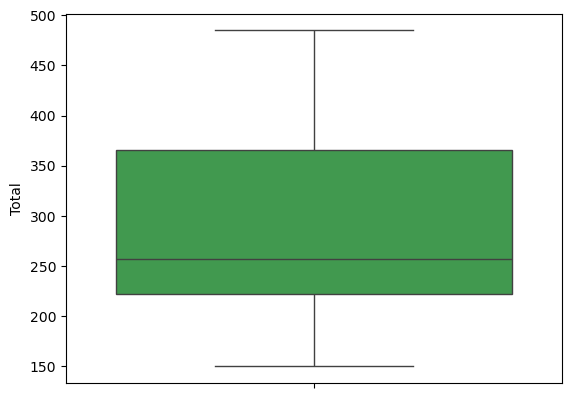

Valor del segundo cuartil (25%): 221.75
Valor del tercer cuartil (75%): 366.00
Valor del rango intercuartil (IQR): 144.25
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): 5.38
	 - Límite superior (considerado extremadamente alto): 582.38
Hay 0 outliers en la variable 'Total'


[]

In [37]:
deteccion_outliers(df = df_columnas, variable = 'Total')

In [38]:
def graficar_boxplot_bivariable_px(df, variable_analisis, variable_categorica):
    # Calcular el orden de las categorías basado en la media de 'variable_analisis' para cada categoría
    orden_categorica = df.groupby(variable_categorica)[variable_analisis].mean().sort_values(ascending=False).index.tolist()

    # Crear el boxplot usando Plotly Express, especificando el orden de las categorías
    fig = px.box(df, x=variable_categorica, y=variable_analisis, color=variable_categorica,
                 category_orders={variable_categorica: orden_categorica})

    # Actualizar títulos del gráfico
    fig.update_layout(title=f'Boxplot de {variable_analisis} por {variable_categorica}',
                      xaxis_title=variable_categorica,
                      yaxis_title=variable_analisis)

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    # Mostrar el gráfico
    fig.show()


In [39]:
graficar_boxplot_bivariable_px (df = df_columnas_orden, variable_analisis = 'Total', variable_categorica = 'País')

Al separar por país vemos gran amplitud pero puede ser por la diferencia de puntuación entre medallistas femeninas y masculinos.

In [40]:
graficar_boxplot_bivariable_px (df = df_columnas, variable_analisis = 'Total', variable_categorica = 'Genero')

Todos los datos son muy parejos. Al separar por género, compruebo un outlier entre las medallistas y busco el dato para tener más información al respecto. Es rusa y participa en la categoría más alta femenina.

In [41]:
df_columnas[df_columnas['Total'] == 331]

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
19,Femenino,+87 kg,2019-04-13,Oro,Tatiana,Kashirina,Rusia,146,185,331


In [42]:
def graficar_barras_porcentaje_px(df, variable_analisis):
    # Contar la frecuencia de la variable de análisis
    volumen = df[variable_analisis].value_counts().reset_index()
    volumen.columns = [variable_analisis, 'Volúmen']

    # Calcular el total y convertir a porcentaje
    total = volumen['Volúmen'].sum()
    volumen['Porcentaje'] = ((volumen['Volúmen'] / total) * 100).round(2)

    # Crear el gráfico de barras
    fig = px.bar(volumen, x=variable_analisis, y='Porcentaje', text='Porcentaje')
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')  # Mostrar como porcentaje
    fig.update_layout(title_text=f'Gráfico de barras: {variable_analisis}',
                      xaxis_title=variable_analisis,
                      yaxis_title='Porcentaje',
                      xaxis={'categoryorder': 'total descending'})

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })
    display(volumen)
    fig.show()

In [43]:
graficar_barras_porcentaje_px(df = df_columnas, variable_analisis = 'País')

,País,Volúmen,Porcentaje
0,Rusia,20,16.67
1,Armenia,14,11.67
2,Bulgaria,10,8.33
3,Bielorrusia,9,7.50
4,Georgia,9,7.50
5,Turquía,9,7.50
6,Rumania,9,7.50
7,Ucrania,8,6.67
8,Italia,6,5.00
9,Reino Unido,6,5.00


Entre 2019 y 2020 el país con mayor número de medallas es Rusia, con 20 medallas. Le siguen Armenia con 14 y Bulgaria con 10 medallas.

### <span style="color: #2A8E3C;"> ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género) </span>

In [87]:
df_medallas_por_país = df_columnas.groupby('País')['Medalla'].value_counts(dropna=False).to_frame().reset_index().pivot_table(index='País', columns='Medalla', values='count', fill_value=0).astype(int)
df_medallas_por_país.sort_values(by = orden_medallas, ascending = False)

Medalla,Oro,Plata,Bronce
País,,,
Ucrania,5,2,1
Rusia,4,9,7
Bulgaria,4,5,1
Armenia,4,3,7
Rumania,4,2,3
Georgia,3,4,2
Bielorrusia,3,3,3
Italia,3,2,1
Turquía,3,1,5


Ampliamos información para ver además el número total de medallas junto al tipo 

In [45]:
def realizar_crosstab(df, variable_categorica_1, variable_categorica_2, normalize):
    # Crear una tabla de contingencia con conteos absolutos
    aux_p1 = pd.crosstab(df[variable_categorica_1], df[variable_categorica_2], margins=True)

    # Crear una tabla de contingencia con porcentajes
    aux_p2 = (pd.crosstab(df[variable_categorica_1],
                          df[variable_categorica_2],
                          normalize=normalize,
                          margins=True
                          ) * 100).round(2)

    # Concatenar ambas tablas para tener conteos y porcentajes en una sola tabla
    tabla_contingencia = pd.concat([aux_p1, aux_p2 ], axis=1)
    return tabla_contingencia

In [46]:
realizar_crosstab(df_columnas, variable_categorica_1 = 'País', variable_categorica_2 ='Medalla', normalize = True)

Medalla,Oro,Plata,Bronce,All,Oro,Plata,Bronce,All
País,,,,,,,,
Albania,0,1,1,2,0.00,0.83,0.83,1.67
Alemania,1,1,0,2,0.83,0.83,0.00,1.67
Armenia,4,3,7,14,3.33,2.50,5.83,11.67
Austria,0,0,1,1,0.00,0.00,0.83,0.83
Azerbaiyán,1,0,1,2,0.83,0.00,0.83,1.67
Bielorrusia,3,3,3,9,2.50,2.50,2.50,7.50
Bulgaria,4,5,1,10,3.33,4.17,0.83,8.33
Bélgica,0,1,1,2,0.00,0.83,0.83,1.67
España,0,1,0,1,0.00,0.83,0.00,0.83


### <span style="color: #2A8E3C;"> ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos? </span>

In [47]:
# Crear DataFrame para almacenar la equidad entre géneros
df_equidad = df_columnas.copy()

# Asignar un valor de 1 a la columna 'Medalla' porque cada fila tiene una medalla.
df_equidad.loc[:, 'Medalla'] = 1

# Agrupar los datos por 'País' y 'Genero', y contar las medallas por cada tipo (Femenino y Masculino)
df_equidad = df_equidad[['País', 'Genero', 'Medalla']].groupby(['País', 'Genero'])['Medalla'].value_counts(dropna=False).to_frame().reset_index().pivot_table(index='País', columns='Genero', values='count', fill_value=0).astype(int)

# Calculamr el total de medallas sumando las medallas de ambos géneros (Femenino y Masculino)
df_equidad['Total'] = df_equidad['Femenino'] + df_equidad['Masculino']

# Calcular la proporción de medallas masculinas y femeninas para cada país
df_equidad['Proporción_Masculino'] = ((df_equidad['Masculino'] / df_equidad['Total']) * 100).round(2)
df_equidad['Proporción_Femenino'] = ((df_equidad['Femenino'] / df_equidad['Total']) * 100).round(2)

# Calcular el índice de equidad entre los géneros para cada país
df_equidad['Equidad'] = ((1 - (abs(df_equidad['Proporción_Masculino'] - df_equidad['Proporción_Femenino']) /
                              (df_equidad['Proporción_Masculino'] + df_equidad['Proporción_Femenino']))) * 100).round(2)

# Obtener el valor máximo de equidad para identificar los países más equitativos
equidad_maxima = df_equidad['Equidad'].max()

# Filtrar los países que tienen el valor máximo de equidad
pais_equitativo = df_equidad[df_equidad['Equidad'] == equidad_maxima].index.tolist()

# Comentario adicional: Si hay varios países con la misma equidad máxima, se mostrarán todos.
if len(pais_equitativo) == 1:
    print(f"El país con mayor equidad es: {pais_equitativo[0]}")
else:
    print(f"Los países con mayor equidad son: {', '.join(map(str, pais_equitativo))}")


Los países con mayor equidad son: Alemania, Azerbaiyán, Moldavia


In [48]:
df_equidad.sort_values(by='Equidad', ascending = False)

Genero,Femenino,Masculino,Total,Proporción_Masculino,Proporción_Femenino,Equidad
País,,,,,,
Azerbaiyán,1,1,2,50.00,50.00,100.00
Alemania,1,1,2,50.00,50.00,100.00
Moldavia,1,1,2,50.00,50.00,100.00
Ucrania,5,3,8,37.50,62.50,75.00
Turquía,3,6,9,66.67,33.33,66.66
Francia,2,1,3,33.33,66.67,66.66
Italia,2,4,6,66.67,33.33,66.66
Letonia,1,2,3,66.67,33.33,66.66
Bulgaria,3,7,10,70.00,30.00,60.00


Realizo una crosstab para tener en cuenta también el peso del número de medallas que aporta el país al total.

Vemos que los países más equitativos son Arzebayán, Alemania y Moldavia, aunque cada género solo tiene 1 medalla por país. Cada uno aporta el 1,67% del total de medallas.

Los países menos equitativos son Reino Unido, Suecia, Albania, Polonia, España, Bélgica, Austria, Georgia.

Destacan de estos últimos Reino Unido con 6 medallas femeninas, que aporta el 5% de las medallas y Georgia con 9 medallas masculinas, que aporta el 7,50% de las medallas. Estos dos países solo aportan medallas de un género.

Y aunque tienen algunas medallas del otro género destacan Rusia (16,7% del total) con 17 medallas femeninas y Armenia(11,67% del total) con 12 masculinas. Se podría decir que los grandes países medalleros se especializan en un solo género.

In [49]:
#Calcular el total de medallas por país y el porcentaje de medallas por país

total_medallas = df_equidad['Total'].sum()
df_equidad['Porcentaje_Medallas'] = (df_equidad['Total'] / total_medallas) * 100

# Calcular la equidad ponderada usando los valores de equidad y el peso de las medallas 
df_equidad['Equidad_Ponderada'] = (df_equidad['Equidad'] * (df_equidad['Porcentaje_Medallas'] / 100)).round(2)


# Mostrar los países con mayor y menor equidad ponderada
# País o países con la mayor equidad ponderada 
max_eq_pond = df_equidad['Equidad_Ponderada'].max() 
paises_max = df_equidad[df_equidad['Equidad_Ponderada'] == max_eq_pond].index.tolist()

if len(paises_max) == 1:
    print(f"El país con mayor equidad ponderada es: {paises_max[0]}") 
else:
    print(f"Los países con mayor equidad ponderada son: {', '.join(map(str, paises_max))}")

# País o países con la menor equidad ponderada 
min_eq_pond = df_equidad['Equidad_Ponderada'].min() 
paises_min = df_equidad[df_equidad['Equidad_Ponderada'] == min_eq_pond].index.tolist()

if len(paises_min) == 1:
    print(f"El país con menor equidad ponderada es: {paises_min[0]}") 
else:
    print(f"Los países con menor equidad ponderada son: {', '.join(map(str, paises_min))}")

# Mostrar los países que solo aportan medallas de un género 
paises_unico_genero = df_equidad[(df_equidad['Femenino'] == 0) | (df_equidad['Masculino'] == 0)].index.tolist() 
print(f"Los países que solo aportan medallas de un género son: {', '.join(paises_unico_genero)}")

# Tabla de resultados
df_resultados = df_equidad.sort_values(by='Equidad_Ponderada', ascending=False)

tabla_resultados = df_resultados[['Total', 'Masculino', 'Femenino', 'Equidad', 'Porcentaje_Medallas', 'Equidad_Ponderada']]
tabla_resultados = tabla_resultados.rename(columns={
    'Total': 'Total Medallas',
    'Masculino': 'Medallas Masculinas',
    'Femenino': 'Medallas Femeninas',
    'Equidad': 'Equidad (%)',
    'Porcentaje_Medallas': '% del Total Global',
    'Equidad_Ponderada': 'Equidad Ponderada'
})

tabla_resultados['Equidad (%)'] = tabla_resultados['Equidad (%)'].round(2)
tabla_resultados['% del Total Global'] = tabla_resultados['% del Total Global'].round(2)


print("\n\n=== TABLA DE EQUIDAD DE GÉNERO POR PAÍSES ===")
tabla_resultados


Los países con mayor equidad ponderada son: Bulgaria, Rusia, Turquía, Ucrania
Los países con menor equidad ponderada son: Albania, Austria, Bélgica, España, Georgia, Polonia, Reino Unido, Suecia
Los países que solo aportan medallas de un género son: Albania, Austria, Bélgica, España, Georgia, Polonia, Reino Unido, Suecia


=== TABLA DE EQUIDAD DE GÉNERO POR PAÍSES ===


Genero,Total Medallas,Medallas Masculinas,Medallas Femeninas,Equidad (%),% del Total Global,Equidad Ponderada
País,,,,,,
Ucrania,8,3,5,75.00,6.67,5.00
Turquía,9,6,3,66.66,7.50,5.00
Bulgaria,10,7,3,60.00,8.33,5.00
Rusia,20,3,17,30.00,16.67,5.00
Armenia,14,12,2,28.58,11.67,3.33
Bielorrusia,9,7,2,44.44,7.50,3.33
Italia,6,4,2,66.66,5.00,3.33
Azerbaiyán,2,1,1,100.00,1.67,1.67
Francia,3,1,2,66.66,2.50,1.67


### <span style="color: #2A8E3C;"> ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos? </span>

In [50]:
# Crear una copia del DataFrame original
df_equidad_medallas = df_columnas.copy()

# Obtener el promedio de puntos totales por país y género
df_equidad_medallas = df_equidad_medallas[['País', 'Genero', 'Total']].groupby(['País', 'Genero'])['Total'].mean().to_frame().reset_index().pivot_table(index='País', columns='Genero', values='Total', fill_value=0).astype(int)

# Calcular la diferencia absoluta entre puntos de atletas femeninos y masculinos
df_equidad_medallas['Diferencia'] = abs(df_equidad_medallas['Femenino'] - df_equidad_medallas['Masculino'])

# Encontrar el valor mínimo de diferencia
min_diferencia = df_equidad_medallas['Diferencia'].min()

# Identificar todos los países con la diferencia mínima
paises_min_diferencia = df_equidad_medallas[df_equidad_medallas['Diferencia'] == min_diferencia].index.tolist()

# Mostrar resultado según la cantidad de países encontrados
if len(paises_min_diferencia) == 1:
    print(f"El país con menor diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos es: {paises_min_diferencia[0]}")
else:
    print(f"Los países con menor diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos son: {', '.join(paises_min_diferencia)}")

El país con menor diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos es: Rumania


In [51]:
df_equidad_medallas.sort_values(by='Diferencia', ascending = True)

Genero,Femenino,Masculino,Diferencia
País,,,
Rumania,213,248,35
Alemania,222,311,89
Francia,220,312,92
Moldavia,245,339,94
Ucrania,242,348,106
Turquía,185,293,108
Italia,198,326,128
Letonia,221,350,129
Bulgaria,155,320,165


# <span style="color: #2A8E3C;"> **Fase 2.** Web scraping </span>

## <span style="color: #2A8E3C;"> Paso 1. Importar librerías </span>

In [52]:
from bs4 import BeautifulSoup
import requests

## <span style="color: #2A8E3C;"> Paso 2. Cargar datos </span>

In [53]:
urls = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021', 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022' , 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023' ,'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024'
dict_datos_ = {}

for url in urls:
    # Extraer el año de la URL
    año = url.split('_')[-1]  # Separamos por '_' y tomamos el último elemento
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = pd.read_html(response.text)
    #Tras analizar las tablas, las que me interesan son la 2 y la 3. En la 2 están los hombres y en la 3 las mujeres.
    #Creo la columna 'Genero' para poder unirla con los DataFrames de los años anteriores.
    for table in tables:
        df_male = tables[2]
        df_male['Genero'] = 'Masculino'
        df_female= tables[3]
        df_female['Genero'] = 'Femenino'
    df_= pd.concat([df_male, df_female] , ignore_index= True)
    #Creo la columna 'Año' a partir del contador_año.
    df_['Año'] = año 
    dict_datos_[url] = df_
    df_.columns = ['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero', 'Año']

In [54]:
dict_datos_.keys()

dict_keys(['https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021', 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022', 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023', 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024'])

## <span style="color: #2A8E3C;"> Paso 3. Exploración inicial </span> 

In [55]:
for k, v in dict_datos_.items():
    print("_"*len(k))
    print(k)
    print("_"*len(k))
    exploracion_inicial(df = v)

________________________________________________________________________
https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
________________________________________________________________________
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 20 filas y 6 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,Masculino,2021
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,Masculino,2021
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,Masculino,2021
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,Masculino,2021
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,Masculino,2021



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,Femenino,2021
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,Femenino,2021
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,Femenino,2021
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,Femenino,2021
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,Femenino,2021



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
5,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,Masculino,2021
6,96 kg (09.04),Anton Pliesnoi Georgia 180 + 213 = 393,Piotr Asayonak Bielorrusia 172 + 202 = 374,Hakob Mkrtchian Armenia 160 + 212 = 372,Masculino,2021
8,109 kg (10.04),Dmytro Chumak Ucrania 181 + 226 = 407,Jristo Jristov Bulgaria 186 + 220 = 406,Timur Naniyev Rusia 184 + 217 = 401,Masculino,2021
7,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,Masculino,2021
9,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,Masculino,2021



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Genero
	 - Año

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Genero     object
Año        object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    6
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Even

,Eventos,Oro,Plata,Bronce,Genero,Año
count,20,20,20,20,20,20
unique,19,20,20,20,2,1
top,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,Masculino,2021
freq,2,1,1,1,10,20



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Genero     0
Año        0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Genero     0.0
Año        0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################
________________________________________________________________________
https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
________________________________________________________________________
¿Cuántas fila

,Eventos,Oro,Plata,Bronce,Genero,Año
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Masculino,2022
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Masculino,2022
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Masculino,2022
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Masculino,2022
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Masculino,2022



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
15,71 kg (01.06),Patricia Strenius Suecia 94 + 130 = 224,Lisa Marie Schweizer Alemania 103 + 120 = 223,Monika Marach Polonia 99 + 116 = 215,Femenino,2022
16,76 kg (02.06),Marie Fegue Francia 110 + 135 = 245,Daniela Ivanova Letonia 96 + 126 = 222,Dilara Ucan Turquía 99 + 121 = 220,Femenino,2022
17,81 kg (03.06),Iryna Deja Ucrania 116 + 137 = 253,Alina Marushchak Ucrania 108 + 127 = 235,Dilara Narin Turquía 99 + 133 = 232,Femenino,2022
18,87 kg (04.06),Solfrid Koanda Noruega 109 + 143 = 252,Anastasiya Manievska Ucrania 107 + 130 = 237,Anastasiya Hotfrid Georgia 106 + 129 = 235,Femenino,2022
19,+87 kg (05.06),Emily Campbell Reino Unido 118 + 153 = 271,Melike Günal Turquía 108 + 134 = 242,Sarah Fischer Austria 102 + 128 = 230,Femenino,2022



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Masculino,2022
10,45 kg (28.05),Şaziye Erdoğan Turquía 73 + 90 = 163[n 1]​,Cansu Bektaş Turquía 68 + 85 = 153[n 1]​,Radmila Zagorac Serbia 68 + 84 = 152[n 1]​,Femenino,2022
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Masculino,2022
19,+87 kg (05.06),Emily Campbell Reino Unido 118 + 153 = 271,Melike Günal Turquía 108 + 134 = 242,Sarah Fischer Austria 102 + 128 = 230,Femenino,2022
14,64 kg (31.05),Mariya Hanhur Ucrania 102 + 120 = 222,Nuray Güngör Turquía 99 + 120 = 219,Vicky Graillot Francia 89 + 119 = 208,Femenino,2022



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Genero
	 - Año

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Genero     object
Año        object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    6
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Even

,Eventos,Oro,Plata,Bronce,Genero,Año
count,20,20,20,20,20,20
unique,19,20,20,20,2,1
top,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Masculino,2022
freq,2,1,1,1,10,20



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Genero     0
Año        0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Genero     0.0
Año        0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################
________________________________________________________________________
https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
________________________________________________________________________
¿Cuántas fila

,Eventos,Oro,Plata,Bronce,Genero,Año
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino,2023
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino,2023
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino,2023
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino,2023
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino,2023



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
15,71 kg (19.04),Loredana Toma Rumania 110 + 130 = 240,Giulia Miserendino Italia 105 + 125 = 230,Sarah Davies Reino Unido 100 + 126 = 226,Femenino,2023
16,76 kg (20.04),Marie Fegue Francia 113 + 140 = 253,Tatev Hakobian Armenia 104 + 122 = 226,Daniela Ivanova Letonia 96 + 126 = 222,Femenino,2023
17,81 kg (21.04),Iryna Deja Ucrania 123 + 135 = 258,Dilara Narin Turquía 101 + 134 = 235,Elena Erighina Moldavia 104 + 130 = 234,Femenino,2023
18,87 kg (22.04),Solfrid Koanda Noruega 117 + 155 = 272,Anastasiya Manievska Ucrania 108 + 130 = 238,Hripsime Jurshudian Armenia 107 + 120 = 227,Femenino,2023
19,+87 kg (23.04),Emily Campbell Reino Unido 110 + 143 = 253,Anastasiya Hotfrid Georgia 117+ 135 = 252,Valentyna Kisil Ucrania 111 + 133 = 244,Femenino,2023



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
18,87 kg (22.04),Solfrid Koanda Noruega 117 + 155 = 272,Anastasiya Manievska Ucrania 108 + 130 = 238,Hripsime Jurshudian Armenia 107 + 120 = 227,Femenino,2023
11,49 kg (15.04),Mihaela Cambei Rumania 92 + 106 = 198,Giulia Imperio Italia 83 + 100 = 183,Anhelina Lomachynska Ucrania 81 + 95 = 176,Femenino,2023
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino,2023
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino,2023
17,81 kg (21.04),Iryna Deja Ucrania 123 + 135 = 258,Dilara Narin Turquía 101 + 134 = 235,Elena Erighina Moldavia 104 + 130 = 234,Femenino,2023



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Genero
	 - Año

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Genero     object
Año        object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    6
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Even

,Eventos,Oro,Plata,Bronce,Genero,Año
count,20,20,20,20,20,20
unique,19,20,20,20,2,1
top,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino,2023
freq,2,1,1,1,10,20



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Genero     0
Año        0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Genero     0.0
Año        0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################
________________________________________________________________________
https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024
________________________________________________________________________
¿Cuántas fila

,Eventos,Oro,Plata,Bronce,Genero,Año
0,55 kg (13.02),Anguel Rusev Bulgaria 109 + 135 = 244[n 1]​,Ramin Shamilishvili Georgia 111 + 130 = 241[n...,Dzhan Zarkov Bulgaria 102 + 133 = 235[n 1]​,Masculino,2024
1,61 kg (13.02),Gabriel Marinov Bulgaria 121 + 160 = 281,Ivan Dimov Bulgaria 130 + 150 = 280,Shota Mishvelidze Georgia 125 + 147 = 272,Masculino,2024
2,67 kg (14.02),Gor Sahakian Armenia 140 + 171 = 311,Kaan Kahriman Turquía 142 + 168 = 310,Ferdi Hardal Turquía 135 + 169 = 304,Masculino,2024
3,73 kg (15.02),Bozhidar Andreev Bulgaria 155 + 193 = 348,Muhammed Özbek Turquía 150 + 186 = 336,Ritvars Suharevs Letonia 154 + 177 = 331,Masculino,2024
4,81 kg (16.02),Oscar Reyes Martínez Italia 155 + 191 = 346,Kristi Ramadani Albania 151 + 190 = 341,Rafik Harutiunian Armenia 154 + 182 = 336,Masculino,2024



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
15,71 kg (16.02),Loredana Toma Rumania 114 + 127 = 241,Siuzanna Valodzka AIN[a 1]​ 105 + 130 = 235,Lisa Marie Schweizer Alemania 107 + 124 = 231,Femenino,2024
16,76 kg (17.02),Genna Toko Kegne Italia 101 + 120 = 221,Nikol Rubanovich Israel 99 + 117 = 216,Lara Dancz Alemania 101 + 114 = 215,Femenino,2024
17,81 kg (18.02),Weronika Zielińska-Stubińska Polonia 103 + 13...,Elena Erighina Moldavia 103+ 131 = 234,Dilara Narin Turquía 97 + 125 = 222,Femenino,2024
18,87 kg (19.02),Solfrid Koanda Noruega 120 + 160 = 280,Anastasiya Manievska Ucrania 102 + 128 = 230,Hripsime Jurshudian Armenia 105 + 122 = 227,Femenino,2024
19,+87 kg (20.02),Emily Campbell Reino Unido 112 + 151 = 263,Anastasiya Hotfrid Georgia 117 + 140 = 257,Fatmagül Çevik Turquía 107 + 131 = 238,Femenino,2024



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Genero,Año
13,59 kg (14.02),Kamila Konotop Ucrania 105 + 125 = 230,Dora Tchakounté Francia 98 + 117 = 215,Saara Retulainen Finlandia 95 + 119 = 214,Femenino,2024
6,96 kg (18.02),Hakob Mkrtchian Armenia 166 + 209 = 375,Davit Hovhannisian Armenia 169 + 205 = 374,Pavel Jadasevich AIN[a 1]​ 165 + 195 = 360,Masculino,2024
14,64 kg (15.02),Hanna Davydova Ucrania 100 + 120 = 220,Svitlana Samuliak Ucrania 101 + 118 = 219,Wiktoria Wołk Polonia 94 + 121 = 215,Femenino,2024
5,89 kg (17.02),Karlos Nasar Bulgaria 176 + 215 = 391,Antonino Pizzolato Italia 170 + 210 = 380,Marin Robu Moldavia 171+ 207 = 378,Masculino,2024
11,49 kg (12.02),Mihaela Cambei Rumania 90 + 109 = 199,Oliwia Drzazga Polonia 74 + 96 = 170,Tham Nguyen Irlanda 74 + 95 = 169,Femenino,2024



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Genero
	 - Año

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Genero     object
Año        object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    6
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Even

,Eventos,Oro,Plata,Bronce,Genero,Año
count,20,20,20,20,20,20
unique,19,20,20,20,2,1
top,55 kg (13.02),Anguel Rusev Bulgaria 109 + 135 = 244[n 1]​,Ramin Shamilishvili Georgia 111 + 130 = 241[n...,Dzhan Zarkov Bulgaria 102 + 133 = 235[n 1]​,Masculino,2024
freq,2,1,1,1,10,20



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Genero     0
Año        0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Genero     0.0
Año        0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


## <span style="color: #2A8E3C;"> Paso 4. Crear un único dataframe con los datos de 2019 a 2024 </span>

In [56]:
df_ =pd.concat([df] + list(dict_datos_.values()), ignore_index=True)
df_.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


In [57]:
exploracion_inicial(df = df_, tipo = 'lite')    

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 6 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


In [58]:
duplicados = df_.duplicated(subset=['Eventos', 'Oro', 'Plata', 'Bronce'])

# Mostrar los duplicados
df_duplicados = df_[duplicados]
df_duplicados

,Eventos,Oro,Plata,Bronce,Año,Genero
40,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2021,Masculino
41,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2021,Masculino
42,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2021,Masculino
43,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2021,Masculino
44,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2021,Masculino
45,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,2021,Masculino
46,96 kg (09.04),Anton Pliesnoi Georgia 180 + 213 = 393,Piotr Asayonak Bielorrusia 172 + 202 = 374,Hakob Mkrtchian Armenia 160 + 212 = 372,2021,Masculino
47,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2021,Masculino
48,109 kg (10.04),Dmytro Chumak Ucrania 181 + 226 = 407,Jristo Jristov Bulgaria 186 + 220 = 406,Timur Naniyev Rusia 184 + 217 = 401,2021,Masculino
49,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,2021,Masculino


Comprobamos que toda la tabla de 2021 es la misma que la de 2020. 

Consultamos wikipedia y vemos `https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020` nos lleva a la web de 2021 y hay una breve explicación: **"Originalmente el campeonato estaba planeado realizarse en abril de 2020,pero debido a la pandemia de COVID-19 el evento fue pospuesto para finales de octubre, y posteriormente para 2021."**

Tras ver este dato, eliminamos los datos de 2020 y nos quedamos con los de 2021

In [59]:
df_ = df_[~df_.duplicated(subset=['Eventos', 'Oro', 'Plata', 'Bronce'], keep='last')]

In [60]:
#Comprobar que se han eliminado los datos del año 2020
df_[df_['Año']==2020]

,Eventos,Oro,Plata,Bronce,Año,Genero


In [61]:
exploracion_inicial(df = df_, tipo = 'lite')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 100 filas y 6 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


## <span style="color: #2A8E3C;"> Paso 5. Transformar los datos </span>

Reutilizo la función creada previamente y comprobamos que se haya aplicado correctamente.

In [62]:
df_[['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero']]
df_medallas_24 = transformar_datos (df_)
exploracion_inicial(df = df_medallas_24, tipo = 'lite')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 300 filas y 5 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos    0
Año        0
Genero     0
Medalla    0
Atleta     0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos    0.0
Año        0.0
Genero     0.0
Medalla    0.0
Atleta     0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

########################################################################################


## <span style="color: #2A8E3C;"> Paso 6. Creación de columnas </span>

Vamos a crear las siguientes columnas:
- `Fecha` : Juntando los datos de día y mes de la columna `Evento`y el `Año`
- `Nombre`: Extrayendo los datos de la columna `Atleta`
- `Apellido`: Extrayendo los datos de la columna `Atleta`
- `País`: Extrayendo los datos de la columna `Atleta`
- `Resultados`: Extrayendo los datos de la columna `Atleta`
- `Arrancada` : Extrayendo los datos de la columna `Atleta`
- `Dos tiempos`: Extrayendo los datos de la columna `Atleta`
- `Total`: Extrayendo los datos de la columna `Atleta`

primero, vamos a eliminar `[n 1]\u200b`, `[2]`,​ `[n 2]\u200b `

In [63]:
columnas_resultado = ['Eventos', 'Año', 'Atleta']
df_medallas_24[columnas_resultado] = df_medallas_24[columnas_resultado].replace(r'\[\s*(n\s*)?[12]\]\s*[\u200B]*|\[\s*a\s*[12]\]\u200B*', ' ', regex=True)

Se prioriza la correcta identificación de países sobre la precisión en la distinción entre nombres y apellidos compuestos.

No se encontraron otros países con nombres compuestos de dos palabras en el conjunto de datos original.

En los casos de 4 palabras con país distinto a "Reino Unido", las palabras intermedias se asignan al campo "Apellido" aunque en algunos casos podrían corresponder a un segundo nombre.

In [68]:
crear_columnas_desde_Atleta (df = df_medallas_24)

Errores = 0


Utilizamos `.unique`para comprobar que se han transformado correctamente los Nombres, Apellidos y Países.

Aparece como `País` AIN y es que Los deportistas de Bielorrusia compitieron bajo la denominación «Atletas Independientes Neutrales»

In [71]:
df_medallas_24.País.unique() 

array(['Italia', 'Bielorrusia', 'Francia', 'Bulgaria', 'Armenia',
       'Ucrania', 'Georgia', 'Turquía', 'Rumania', 'Polonia', 'Letonia',
       'Rusia', 'Alemania', 'Azerbaiyán', 'Reino Unido', 'Albania',
       'Suecia', 'Noruega', 'España', 'Bélgica', 'Moldavia', 'Israel',
       'Austria', 'Serbia', 'Irlanda', 'Finlandia'], dtype=object)

In [70]:
df_medallas_24 = df_medallas_24.replace('AIN', 'Bielorrusia', regex=True)
df_medallas_24.País.unique() 

array(['Italia', 'Bielorrusia', 'Francia', 'Bulgaria', 'Armenia',
       'Ucrania', 'Georgia', 'Turquía', 'Rumania', 'Polonia', 'Letonia',
       'Rusia', 'Alemania', 'Azerbaiyán', 'Reino Unido', 'Albania',
       'Suecia', 'Noruega', 'España', 'Bélgica', 'Moldavia', 'Israel',
       'Austria', 'Serbia', 'Irlanda', 'Finlandia'], dtype=object)

In [75]:
crear_columnas_desde_Resultados(df = df_medallas_24)

In [76]:
crear_columnas_desde_Eventos (df = df_medallas_24)

Comprobamos que se hayan aplicado correctamente la creación de las columnas

In [78]:
exploracion_inicial(df = df_medallas_24)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 300 filas y 13 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261,Mirco,Scarantino,Italia,116 + 145 = 261,116,145,261,06-04-2019
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286,Henadz,Laptseu,Bielorrusia,133 + 153 = 286,133,153,286,07-04-2019
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312,Bernardin,Matam,Francia,137 + 175 = 312,137,175,312,08-04-2019
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345,Bozhidar,Andreev,Bulgaria,153 + 192 = 345,153,192,345,09-04-2019
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356,Antonino,Pizzolato,Italia,155 + 201 = 356,155,201,356,10-04-2019



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
295,71 kg (16.02),2024,Femenino,Bronce,Lisa Marie Schweizer Alemania 107 + 124 = 231,Lisa,Marie Schweizer,Alemania,107 + 124 = 231,107,124,231,16-02-2024
296,76 kg (17.02),2024,Femenino,Bronce,Lara Dancz Alemania 101 + 114 = 215,Lara,Dancz,Alemania,101 + 114 = 215,101,114,215,17-02-2024
297,81 kg (18.02),2024,Femenino,Bronce,Dilara Narin Turquía 97 + 125 = 222,Dilara,Narin,Turquía,97 + 125 = 222,97,125,222,18-02-2024
298,87 kg (19.02),2024,Femenino,Bronce,Hripsime Jurshudian Armenia 105 + 122 = 227,Hripsime,Jurshudian,Armenia,105 + 122 = 227,105,122,227,19-02-2024
299,+87 kg (20.02),2024,Femenino,Bronce,Fatmagül Çevik Turquía 107 + 131 = 238,Fatmagül,Çevik,Turquía,107 + 131 = 238,107,131,238,20-02-2024



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
44,81 kg (01.06),2022,Masculino,Oro,Rafik Harutiunian Armenia 160 + 194 = 354,Rafik,Harutiunian,Armenia,160 + 194 = 354,160,194,354,01-06-2022
171,49 kg (15.04),2023,Femenino,Plata,Giulia Imperio Italia 83 + 100 = 183,Giulia,Imperio,Italia,83 + 100 = 183,83,100,183,15-04-2023
28,109 kg (10.04),2021,Masculino,Oro,Dmytro Chumak Ucrania 181 + 226 = 407,Dmytro,Chumak,Ucrania,181 + 226 = 407,181,226,407,10-04-2021
199,+87 kg (20.02),2024,Femenino,Plata,Anastasiya Hotfrid Georgia 117 + 140 = 257,Anastasiya,Hotfrid,Georgia,117 + 140 = 257,117,140,257,20-02-2024
283,73 kg (15.02),2024,Masculino,Bronce,Ritvars Suharevs Letonia 154 + 177 = 331,Ritvars,Suharevs,Letonia,154 + 177 = 331,154,177,331,15-02-2024



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Eventos
	 - Año
	 - Genero
	 - Medalla
	 - Atleta
	 - Nombre
	 - Apellido
	 - País
	 - Resultados
	 - Arrancada
	 - Dos Tiempos
	 - Total
	 - Fecha

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Eventos        object
Año            object
Genero         object
Medalla        object
Atleta         object
Nombre         object
Apellido       object
País           object
Resultados     object
Arrancada      object
Dos Tiempos    object
Total          object
Fecha          object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    13
Name: count, dtype: int64

########################################################################################
¿Cómo podríam

,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Resultados,Arrancada,Dos Tiempos,Total,Fecha
count,300,300,300,300,300,300,300,300,300,300,300,300,300
unique,96,5,2,3,298,151,170,26,280,117,130,173,44
top,55 kg (04.04),2019,Masculino,Oro,Nuray Güngör Turquía 99 + 120 = 219,Anastasiya,Campbell,Armenia,110 + 130 = 240,101,120,235,13-04-2019
freq,6,60,150,100,2,11,5,44,2,8,12,7,12



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Eventos        0
Año            0
Genero         0
Medalla        0
Atleta         0
Nombre         0
Apellido       0
País           0
Resultados     0
Arrancada      0
Dos Tiempos    0
Total          0
Fecha          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Eventos        0.0
Año            0.0
Genero         0.0
Medalla        0.0
Atleta         0.0
Nombre         0.0
Apellido       0.0
País           0.0
Resultados     0.0
Arrancada      0.0
Dos Tiempos    0.0
Total          0.0
Fecha          0.0
dtype: float64

########################################################################################
¿Hay filas duplicadas en el conjunto de datos?
	Existen duplicados: False
	Número total de filas duplicadas: 0

#####################

## <span style="color: #2A8E3C;"> Paso 7. Filtrado de columnas y ordenación </span>

Selecciono solo las columnas que voy a utilizar:

In [80]:
df_columnas_24 = df_medallas_24.loc[:,['Genero','Eventos', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']]

In [81]:
#Extraer solo los números y añadir espacio y kg
df_columnas_24["Categoría"] = df_columnas_24.Eventos.str.extract(r'(\+?\d{1,3})')[0] + " kg" 

#Compruebar si se ha eliminado correctamente el \xa0 y añadido kg
df_columnas_24['Categoría'].unique() 

array(['55 kg', '61 kg', '67 kg', '73 kg', '81 kg', '89 kg', '96 kg',
       '102 kg', '109 kg', '+109 kg', '45 kg', '49 kg', '59 kg', '64 kg',
       '71 kg', '76 kg', '87 kg', '+87 kg'], dtype=object)

Ordeno las columnas para que queden en el orden solicitado:

In [82]:
df_columnas_24= df_columnas[['Genero', 'Categoría', 'Fecha', 'Medalla','Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']].copy()
df_columnas_24.head()

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,Masculino,55 kg,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356


## <span style="color: #2A8E3C;"> Paso 8. Tipo de datos </span> 

In [84]:
fecha_procesada(df_columnas_24, variable_analisis = 'Fecha')

Número de valores nulos en 'Fecha_procesada': 0


In [85]:
columnas_a_integer = ['Arrancada', 'Dos Tiempos', 'Total']
for columnas in columnas_a_integer:
    tipo_de_dato_integer(df = df_columnas_24 , variable_a_transformar = columnas)

Número de valores nulos en Arrancada: 0
Número de valores nulos en Dos Tiempos: 0
Número de valores nulos en Total: 0


In [88]:
df_columnas_24.Medalla = pd.Categorical(df_columnas_24.Medalla, categories=orden_medallas)

In [89]:
# Comprobar el tipo de datos de cada columna
df_columnas_24.dtypes

Genero               category
Categoría            category
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos Tiempos             int64
Total                   int64
dtype: object

## <span style="color: #2A8E3C;"> Paso 9. Ordendar </span> 


Nos solicitan ordenar la tabla por Categoría, Género y Medalla


In [ ]:
df_columnas_24.Genero = pd.Categorical(df_columnas_24.Genero, categories=orden_genero)
df_columnas_24.Categoría = pd.Categorical(df_columnas_24.Categoría, categories=orden_categoria)

In [91]:
df_columnas_24.sort_values(by=['Genero', 'Categoría', 'Medalla'])

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
10,Femenino,45 kg,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
30,Femenino,45 kg,2020-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
50,Femenino,45 kg,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
70,Femenino,45 kg,2020-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
90,Femenino,45 kg,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
...,...,...,...,...,...,...,...,...,...,...
29,Masculino,+109 kg,2020-04-11,Oro,Lasha,Talajadze,Georgia,222,263,485
49,Masculino,+109 kg,2019-04-13,Plata,Irakli,Turmanidze,Georgia,206,241,447
69,Masculino,+109 kg,2020-04-11,Plata,Gor,Minasian,Armenia,216,248,464
89,Masculino,+109 kg,2019-04-13,Bronce,Ruben,Alexanian,Armenia,195,245,440


## <span style="color: #2A8E3C;"> Paso 10. EDA </span>

Realizamos un análisis exploratorio de los datos.

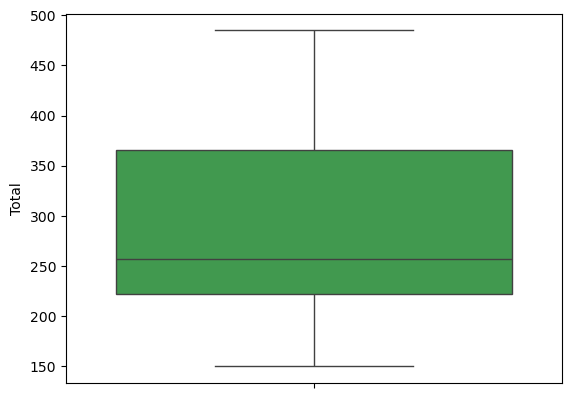

Valor del segundo cuartil (25%): 221.75
Valor del tercer cuartil (75%): 366.00
Valor del rango intercuartil (IQR): 144.25
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): 5.38
	 - Límite superior (considerado extremadamente alto): 582.38
Hay 0 outliers en la variable 'Total'


[]

In [92]:
deteccion_outliers(df = df_columnas_24, variable = 'Total')

In [93]:
graficar_boxplot_bivariable_px (df = df_columnas_24, variable_analisis = 'Total', variable_categorica = 'País')

In [94]:
graficar_boxplot_bivariable_px (df = df_columnas_24, variable_analisis = 'Total', variable_categorica = 'Genero')

In [95]:
df_columnas_24[(df_columnas_24['Total'] == 331) & (df_columnas_24['Genero'] == 'Femenino')]

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
19,Femenino,+87 kg,2019-04-13,Oro,Tatiana,Kashirina,Rusia,146,185,331


In [96]:
"https://es.wikipedia.org/wiki/Tatiana_Kashirina"
#En 2020 fue suspendida provisionalmente por sospechas de dopaje, por lo que no pudo participar en los Juegos Olímpicos de Tokio 2020;​ finalmente, en 2023 se confirmó la violación antidopaje y fue suspendida por ocho años retroactivos desde 2020.

'https://es.wikipedia.org/wiki/Tatiana_Kashirina'

In [97]:
graficar_barras_porcentaje_px(df = df_columnas_24, variable_analisis = 'País')

,País,Volúmen,Porcentaje
0,Rusia,20,16.67
1,Armenia,14,11.67
2,Bulgaria,10,8.33
3,Bielorrusia,9,7.50
4,Georgia,9,7.50
5,Turquía,9,7.50
6,Rumania,9,7.50
7,Ucrania,8,6.67
8,Italia,6,5.00
9,Reino Unido,6,5.00


### <span style="color: #2A8E3C;"> ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)  </span>